## **Heart Disease Prediction Using Neural Networks**



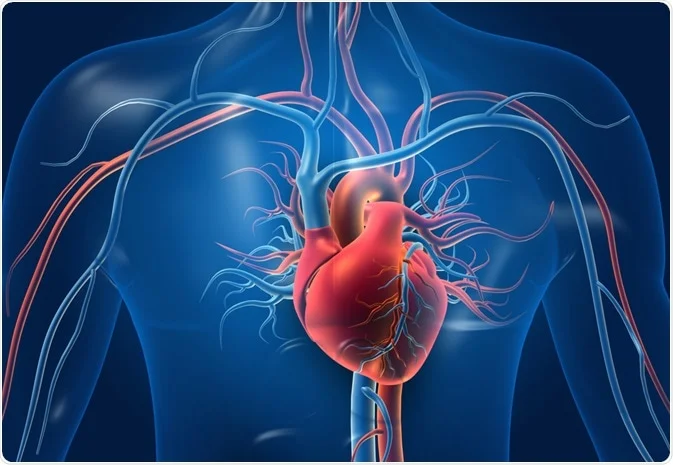

**Heart disease prediction** using **neural networks** can be a powerful tool for identifying individuals who may be at risk for developing cardiovascular problems. Neural networks are a type of machine learning algorithm that can be trained to recognize patterns in data, making them well-suited for tasks like disease prediction.


To use neural networks for heart disease prediction, you would typically start by collecting data on various factors that have been shown to be associated with cardiovascular health, such as age, sex, blood pressure, cholesterol levels, smoking status, family history of heart disease, and other medical conditions. You would also collect data on whether each individual has been diagnosed with heart disease or not.

Next, you would use this data to train a neural network model to recognize patterns in the data that are associated with heart disease. The model would be trained on a subset of the data, with the remaining data used to test the model's accuracy.

There are many different types of neural network architectures that could be used for heart disease prediction, including feedforward networks, convolutional networks, and recurrent networks. The specific architecture chosen would depend on the characteristics of the data and the specific goals of the analysis.

Once the model has been trained, it can be used to predict whether an individual is likely to develop heart disease based on their personal characteristics and medical history. This information could be used by healthcare providers to develop personalized treatment plans or to identify individuals who may benefit from more aggressive prevention strategies.

It is important to note that while neural networks can be powerful tools for disease prediction, they are not a substitute for medical diagnosis or advice from a healthcare professional. Any predictions made by a neural network model should be interpreted in the context of a broader healthcare assessment.

# **Importing Library**

In [ ]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras


# **Printing Version**

In [ ]:
print ('Python: {}'.format(sys.version))
print ('Pandas: {}'.format(pd.__version__))
print ('Numpy: {}'.format(np.__version__))
print ('Sklearn: {}'.format(sklearn.__version__))
print ('Matplotlib: {}'.format(matplotlib.__version__))
print ('Keras: {}'.format(keras.__version__))

Python: 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
Pandas: 1.4.4
Numpy: 1.22.4
Sklearn: 1.2.2
Matplotlib: 3.7.1
Keras: 2.12.0


**Import extra library**

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# **Import dataset**


In [ ]:
# If don't have downloaded dataset below undo comment
# Source : https://archive.ics.uci.edu/ml/datasets/Heart+Disease

url="http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [ ]:
#the names for each column in our pasndas Dataframe
names = ['ages',
       'sex',
       'cp',
       'trestbps',
       'chol',
       'fbs',
       'restecg',
       'thalach',
       'exang',
       'oldpeak',
       'slope',
       'ca',
       'thal',
       'class']


In [ ]:
# read the csv
cleveland=pd.read_csv(url,names=names)
# cleveland=pd.read_csv('processed.cleveland.data',names=names)

In [ ]:
# print the shape of the DataFrame, plus some examples
print("Shape of DataFrame: {}".format(cleveland.shape))
print(cleveland.loc[1])

Shape of DataFrame: (303, 14)
ages         67.0
sex           1.0
cp            4.0
trestbps    160.0
chol        286.0
fbs           0.0
restecg       2.0
thalach     108.0
exang         1.0
oldpeak       1.5
slope         2.0
ca            3.0
thal          3.0
class           2
Name: 1, dtype: object


In [ ]:
# print the last twenty or so data points
cleveland.loc[280:]

,ages,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [ ]:
# rempve missing data (indicated with a "?")
data=cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,ages,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [ ]:
data=data.dropna(axis = 0)
data.loc[280:]

,ages,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0
290,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1


In [ ]:
#drop rows with NaN values from DataFrame

print (data.shape)
print(data.dtypes)

(297, 14)
ages        float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


In [ ]:
# transform data to numeric to enable further analysis
data=data.apply(pd.to_numeric)
data.dtypes

ages        float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object

In [ ]:
# print data characteristics,using pandas describe() funtion

data.describe()

,ages,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


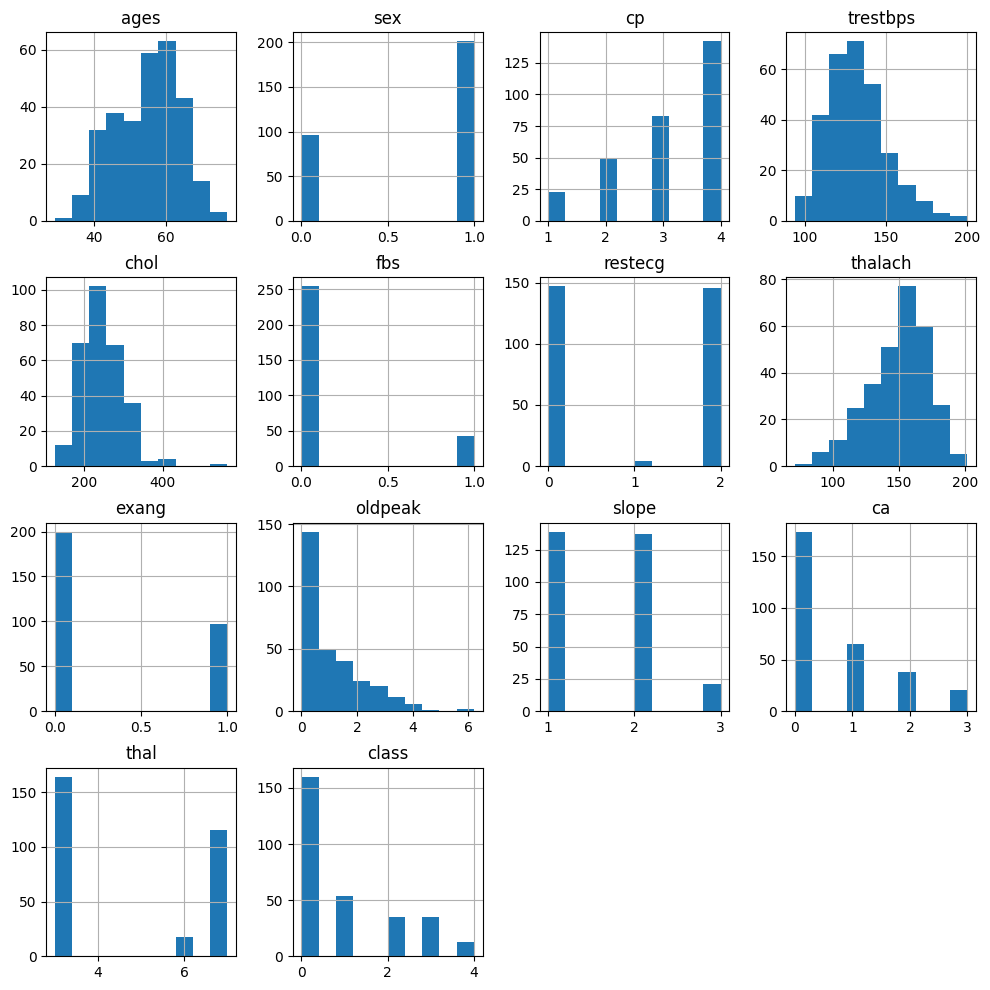

In [ ]:
# plot histogram for each variables
data.hist(figsize=(12,12))
plt.show()

In [ ]:
# create x and y datasets for training 
from sklearn import model_selection

X=np.array(data.drop(['class'], axis=1))
y=np.array(data['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = 0.2)

In [ ]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)

print(Y_train.shape)
print(Y_train[:10])


(237, 5)
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
# define a finction to bulid the keras model

def create_model():
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal',activation='relu'))
    model.add(Dense(4, kernel_initializer='normal',activation='relu'))
    model.add(Dense(5,activation='softmax'))
       #     compile the model
    adam= Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])
    return model

In [ ]:
model=create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 5)                 25        
                                                                 
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# fit the model to the training data
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 1.5435 - accuracy: 0.4008
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.3103 - accuracy: 0.5612
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 1.3020 - accuracy: 0.5612
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2910 - accuracy: 0.5612
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2737 - accuracy: 0.5612
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2673 - accuracy: 0.5612
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2566 - accuracy: 0.5612
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2465 - accuracy: 0.5612
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2396 - accuracy: 0.5612
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2329 - accuracy: 0.5612
Epoch 11/

In [ ]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary>0]=1
Y_test_binary[Y_test_binary>0]=1

print(Y_train_binary[:20])


[1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1]


In [ ]:
# define a new keras model for binary classification

def create_binary_model():
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal',activation='relu'))
    model.add(Dense(4, kernel_initializer='normal',activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
       
       #     compile the model
    adam= Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam,metrics=['accuracy'])
    return model
binary_model = create_binary_model()
print(binary_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 112       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# fit the binary model to the training data
binary_model.fit(X_train, Y_train_binary,epochs=100, batch_size=10, verbose=1)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.6916 - accuracy: 0.5612
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5612
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5612
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5612
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5612
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5612
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5612
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5612
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.5612
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.5612
Epoch 11/

In [ ]:
#  generate classification report using predictions for categorical model
from sklearn.metrics import classification_report,accuracy_score

categorical_pred= model.predict(X_test)
categorical_pred= np.argmax(model.predict(X_test),axis=1)



2/2 [==============================] - 0s 4ms/step


In [ ]:
categorical_pred
print('Results for Categorical Model')
print(accuracy_score(y_test,categorical_pred))
print(classification_report(y_test,categorical_pred))

Results for Categorical Model
0.5833333333333334
              precision    recall  f1-score   support

           0       0.74      0.96      0.84        27
           1       0.14      0.08      0.11        12
           2       0.00      0.00      0.00         9
           3       0.44      0.89      0.59         9
           4       0.00      0.00      0.00         3

    accuracy                           0.58        60
   macro avg       0.27      0.39      0.31        60
weighted avg       0.43      0.58      0.49        60



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# generate classification report using predictions for the binary model
binary_pred=np.round(binary_model.predict(X_test)).astype(int)

print('Result for Binary Model')
print(accuracy_score(Y_test_binary,binary_pred))
print(classification_report(Y_test_binary,binary_pred))

2/2 [==============================] - 0s 7ms/step
Result for Binary Model
0.8
              precision    recall  f1-score   support

           0       0.70      0.96      0.81        27
           1       0.96      0.67      0.79        33

    accuracy                           0.80        60
   macro avg       0.83      0.81      0.80        60
weighted avg       0.84      0.80      0.80        60

